# Support Vector Machine

In [1]:
# import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [2]:
# import breast cancer dataset
from sklearn import datasets
data = datasets.load_breast_cancer()

## Pre-processing

In [3]:
# what features are in the dataset
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# what values does our target have 
data.target_names

array(['malignant', 'benign'], dtype='<U9')

An SVM model requires numerical input, binarize the target column:

In [5]:
from sklearn import preprocessing
# instantiate Label Binarizer model
lb = preprocessing.LabelBinarizer()
# fit the model to our dataset
lb.fit(data.target)
lb.transform(data.target)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [6]:
# assign output of label binarizer to dataframe called y
# apply transform and name the columns
y = pd.DataFrame(lb.transform(data.target),
                columns=["target"])

In [8]:
y["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

## MinMax Scaling

The kernels used in SVM depend on the dot product of matrices, large variance in a dataset can cause issues. Use a min_max scaler to bound all values between (0,1) using an sklearn transfrom based on:

`X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))`

`X_scaled = X_std * (max - min) + min`

In [10]:
from sklearn.preprocessing import MinMaxScaler
# apply to data
X_normalized = MinMaxScaler().fit_transform(data.data)

# save normalized features as dataframe, pull column names
processed_df = pd.DataFrame(X_normalized,
                           columns = [data.feature_names])

In [12]:
# all features are bounded between 0 and 1
processed_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Examine correlation of features

To assist in feature selection, look for highly correlated features that will add similar info to the model so that we can get rid of essentially duplicated info by removing one of the correlated cols.

In [13]:
# create correlation matrix
corr = processed_df.corr()

[]

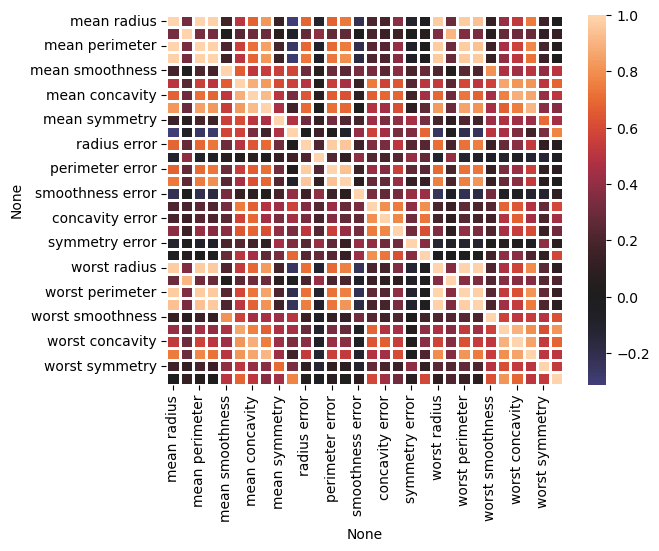

In [14]:
# plot corr matrix
import seaborn as sns

# center color around 0
heatmap = sns.heatmap(corr,
                     linewidth=1,
                     center=0)

# the heatmap can look better
heatmap.plot()

<Axes: xlabel='None', ylabel='None'>

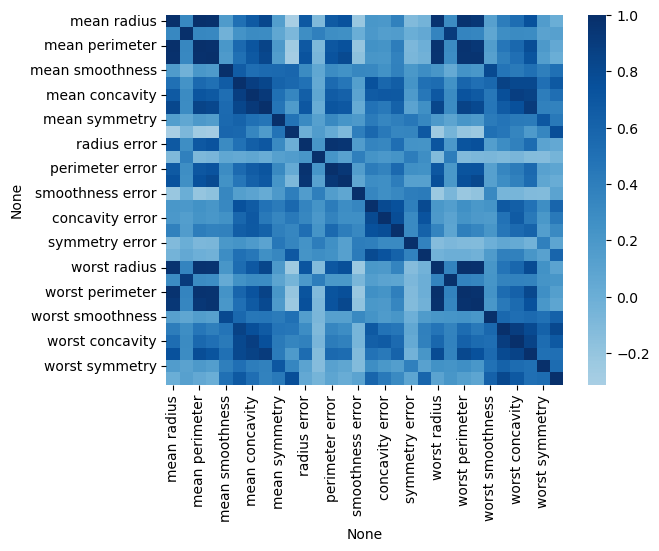

In [15]:
# use color scaling to make it easier to distinguish correlation, one color from light to dark
sns.heatmap(corr, cmap="Blues", center=0)

Remove highly correlated features from the dataset

In [16]:
# set a high correlation threshold to drop only very correlated features
corr_thresh = .9

# select upper triangle of correlation matrix so we do not drop both features
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# find index of cols with corr > threshold
to_drop = [column for column in upper.columns if any(upper[column] > corr_thresh)]

In [18]:
# check if these make sense to drop
to_drop

[('mean perimeter',),
 ('mean area',),
 ('mean concave points',),
 ('perimeter error',),
 ('area error',),
 ('worst radius',),
 ('worst texture',),
 ('worst perimeter',),
 ('worst area',),
 ('worst concave points',)]

In [19]:
# even number means each drop is matched
len(to_drop)

10

In [20]:
# save features as X and drop corr cols
X = processed_df.drop(to_drop, axis=1)

In [21]:
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.686364,0.605518,0.356147,0.120469,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.598462,0.418864
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.379798,0.141323,0.156437,0.082589,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.233590,0.222878
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.509596,0.211247,0.229622,0.094303,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.483590,0.385375,0.359744,0.403706,0.213433
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.776263,1.000000,0.139091,0.175875,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.915472,0.814012,0.548642,1.000000,0.773711
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.378283,0.186816,0.233822,0.093065,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.437364,0.172415,0.319489,0.157500,0.142595


## Train Test Split

Features scaled and targets binarized, pull everything into a dataframe and split for training and holdout.

In [24]:
# train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    shuffle=False)

### Establish baseline model metric

Create a baseline model that can be used to see if future changes improve or decrease model performance.

In [25]:
# create svm model
from sklearn import svm

# instantiate model object
# start with simplest linear model, random algo for reproducibility, and small regularization param
svm = svm.SVC(kernel='linear',
             random_state=42,
             C=1)

In [26]:
# fit model to training dataset
# use np.ravel to reshape data into expected format
svm.fit(X_train,
       np.ravel(y_train))

SVC(C=1, kernel='linear', random_state=42)

In [27]:
# use test dataset to test pred accuracy
y_pred = svm.predict(X_test)

In [28]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# check model accuracy: how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

# model precision: what percentage of positive tuples are labeled as such?
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")

# model recall: what percentage of positive tuples are labelled as such?
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

Accuracy: 0.9824561403508771
Precision: 0.9886363636363636
Recall: 0.9886363636363636
